# Taylor superiores


$$
x^* = \underset{*}{argminf}(x) \\
f:\mathbb{R}^{n x 1} \rightarrow \mathbb{R} \\
x \in \mathbb{R}^{nx1} \\ 
x^* \text{vector, estamos en } \mathbb{R}^{n*} \text{parametros} \\
f(x) \text{ es suave. Derivable continua}
$$

¿Cómo se maximixa?

$$
x^{*} = \underset{*}{argmax} - f(x) = argmin f(x)
$$

Estas dos cosas

$$
\underset{*}{min} f(x) \quad \underset{*}{max} - f(x) 
$$

¿son lo mismo? Nope. Los valores maximo y minimo NO son iguales, pero, el argumento maximo y minimo si son iguales. 

$$
x^* \approx \underset{*}{arg} min Q(x) \\
\text{aka. Polinomio de Taylor cuadratico}
$$

Nota: si los avanzamos más alla de los cuadraticos, se vuelve un problema computacionalmente intratable. 


## Polinomio de Taylor en $\mathbb{R}^n$

$$
1D \rightarrow \sum_{n=0}^{\infty} \cfrac{(x - a)^n}{n!}f^{(n)}(a) \\
f:\mathbb{R}^{nx1} \rightarrow\mathbb{R}
$$

Formas de aporximación 
* Lineal (Tayler) 
* Cuadratica 

## Aproximación lineal (1D) 

$$
f(x) \approx f(a) + (x - a)f^{''}(a) \\
para\ f:\mathbb{R}^{nx1}\rightarrow\mathbb{R} \\
\begin{align*}
f(x) \approx\mathcal{L} &\approx f(x_0) + [x - x_0]^t \nabla f(x_0) \\
&\approx f_0 + [x - x_0]^t \nabla f_0 \\
&\approx f_0 + \delta x_0^+ \nabla f_0
\end{align*} \\
\delta \ \text{es una esfera} \ \delta x_0 = x - x_0
$$

* $(x - a)$ que era un rango, se convierte en una esfera (una bola)
* $\nabla$ es el gradiente. Es un operador de derivadas parciales 
* $\nabla f$ Función gradiente se le aplica a una función $f(x) = f^{nx1} \rightarrow \mathbb{R}$
* $\nabla f_0$Vector gradiente es cuando se ealya en un valor en particular, la función gradiente se converte en el vector gradiente. 

EL gradiente apunta a la dirección de mayor crecimiento. Si $f(x)$ es cuadratica, esto sera igual al termino de taylor en grado cuadratico. Es decir.

$$
\color{SpringGreen}{f(x) = Q(x) = f_0 + [x - x_0]^t\nabla f_0 + \cfrac{1}{2}[x - x_0]^t \nabla^2f_0(x - x_0)}
$$

**¿Cómo hallar el punto critico?** Derivando, pero como estamos en multiples dimensiones, aplicamos el gradiente e igualeamos al cero (el vector de ceros).

\[insertar paso a paso \]

con esto, hallamos una ecuación ára hallar el punto critico para cualquier función cuadratica. 

$$
\color{OrangeRed}{x^*=(-\nabla f_0)(\nabla ^2 f)^-1 + x_0}
$$
* $\nabla f_0$ es un vector 
* $\nabla ^2 f$ es una matrix (la hesiana. Es una matriz no singular, es decir, su determinante no es cero por lo que es invertible) 
* $x_0$ vector 

### valores propios
$$
Ab = \lambda b \\
\lambda \ \text{son los valores propios} \\
b \ \text{vectores propios}
$$

* Si todos los valores propios son mayores que 0, es un minimo global -> fc es convexa
* si todos son mayores o iguales a 0, son un minimo local.
* Si todos son menores que ceros, tenemos un maximo global.
* Si todos son menores o iguales a cero, tenemos un maximo local. 
* en cualquier otro caso, tenemos un punto de silla. 

Condiciones necesarias. $x^*$ es un minimo local.
* $\nabla f = 0$ 1er orden 
* $\nabla ^2 f \ge 0$ 2do orden

Condiciones de suficiencia 
* $\nabla f_0 = $ $x^*$ es un minimizador 
* $\nabla f_0 \ge 0$ local

## Implementación

ejemplo = 
$$
\text{Rosenbrook function} \\
2D \qquad f(x, y) = (a - x)^2 + b(y - x^2)^2
$$

#### Librerías a utilizar

In [228]:
import sympy as sp
import numpy as np
import matplotlib.pylab as plt

#### Obtener los datos de entrada

In [247]:
f = sp.parse_expr(input("f = "))
# Rosenbrook function (x1-1)**2 + 100*(x2-x1**2)**2
# (1-x1)**2 + 10*(y-x**2)**2
f

f =  exp(1)**(-(x**2 + y**2))


exp(-x**2 - y**2)

In [248]:
x = list(f.free_symbols)
x.sort(key=str)
x = sp.Matrix(x).T
x

Matrix([[x, y]])

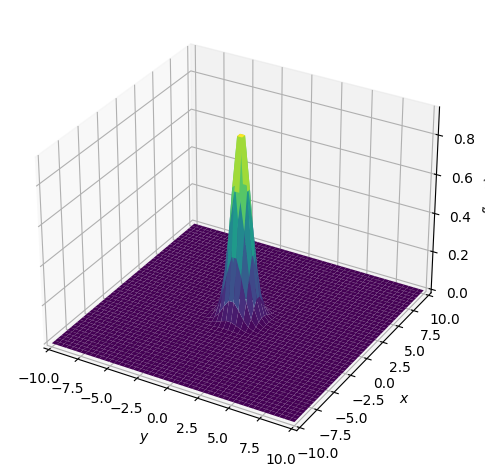

In [249]:
sp.plotting.plot3d(f)

#### Implementar la formula

$$
x^*=(-\nabla f_0)(\nabla ^2 f)^-1 + x_0
$$

1. hallar el gradiente
2. hallar la hessiana
3. dado un punto de expasion x_0, ponerlo todo junto

In [250]:
gradient = sp.Matrix([f.diff(xi) for xi in x])
gradient

Matrix([
[-2*x*exp(-x**2 - y**2)],
[-2*y*exp(-x**2 - y**2)]])

In [251]:
hessian = sp.Matrix([[f.diff(xi).diff(xj) for xi in x] for xj in x])
hessian

Matrix([
[4*x**2*exp(-x**2 - y**2) - 2*exp(-x**2 - y**2),                        4*x*y*exp(-x**2 - y**2)],
[                       4*x*y*exp(-x**2 - y**2), 4*y**2*exp(-x**2 - y**2) - 2*exp(-x**2 - y**2)]])

In [252]:
x0 = sp.Matrix([0, 0]) # Expansion point

gradient_f0 = gradient.subs(list(zip(x, x0)))
hessian_f0 = hessian.subs(list(zip(x, x0)))

xmin =  hessian_f0.inv()*(-gradient_f0) + x0
xmin

Matrix([
[0],
[0]])

#### Condiciones

In [253]:
hessian_fmin = hessian.subs(list(zip(x, xmin)))
hessian_fmin

Matrix([
[-2,  0],
[ 0, -2]])

In [254]:
numeric_eigenvals = [val.evalf() for val in hessian_fmin.eigenvals().keys()]
print(numeric_eigenvals)

[-2.00000000000000]


In [255]:
print("Tipo de punto= ", end="")

if (val > 0 for val in numeric_eigenvals):
    print("Minimo Global")
elif (val >= 0 for val in numeric_eigenvals):
    print("Minimo local")
elif (val < 0 for val in numeric_eigenvals):
    print("Maximo global")
elif (val < 0 for val in numeric_eigenvals):
    print("Maximo local")
else: 
    print("Punto de silla")

if (val == 0 for val in gradient.subs(list(zip(x, xmin)))): 
    print(list(xmin), "es un minimizador")

Tipo de punto= Minimo Global
[0, 0] es un minimizador


#### Graficar los contornos

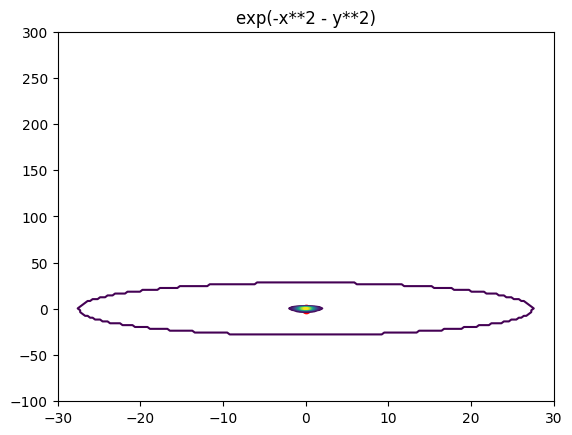

In [256]:
from sympy.utilities.lambdify import lambdify

X, Y = np.meshgrid(np.linspace(-30, 30, 200), np.linspace(-100, 300, 200))
Z = sp.lambdify((x[0], x[1]), f)(X, Y)
plt.contour(X,Y,Z,50)
plt.scatter(xmin[0],xmin[1], color="r"); 
plt.title(f)
plt.show()